## **다음 분기에 어떤 게임을 설계해야 할까!!**

#### 1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
#### 2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
#### 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.


* Name : 게임의 이름입니다.
* Platform : 게임이 지원되는 플랫폼의 이름입니다.
* Year : 게임이 출시된 연도입니다.
* Genre : 게임의 장르입니다.
* Publisher : 게임을 배급한 회사입니다.
* NA_Sales : 북미지역에서의 출고량입니다.
* EU_Sales : 유럽지역에서의 출고량입니다.
* JP_Sales : 일본지역에서의 출고량입니다.
* Other_Sales : 기타지역에서의 출고량입니다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [ ]:
df = pd.read_csv('vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
# 불필요한 'Unnamed: 0' column 삭제
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Sales 국가와 출고량 데이터 단일화
df = pd.melt(df, id_vars=['Name', 'Platform', 'Year', 'Genre', 'Publisher'], var_name='Sales_Area', value_name='Sales_Volume')

In [ ]:

# Sales_volume의 type을 float로 변경
df['Sales_Volume'] = df['Sales_Volume'].str.replace(r'[^0-9.]', '', regex=True)
df = df.astype({'Sales_Volume': 'float'})
df = df[df['Sales_Volume'] > 0].reset_index(drop=True)

df.head()

,Name,Platform,Year,Genre,Publisher,Sales_Area,Sales_Volume
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,NA_Sales,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,NA_Sales,0.17
2,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,NA_Sales,0.04
3,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,NA_Sales,0.12
4,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,NA_Sales,0.02


In [ ]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
Sales_Area      0
Sales_Volume    0
dtype: int64

In [ ]:
df = df.astype({'Year':'int'})
df = df.astype({'Year':'string'})
df.dtypes

Name             object
Platform         object
Year             string
Genre            object
Publisher        object
Sales_Area       object
Sales_Volume    float64
dtype: object

In [ ]:
df['Sales_Area'] = df['Sales_Area'].str.replace('_Sales', "").astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38444 entries, 0 to 39230
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          38444 non-null  object  
 1   Platform      38444 non-null  object  
 2   Year          38444 non-null  string  
 3   Genre         38444 non-null  object  
 4   Publisher     38444 non-null  object  
 5   Sales_Area    38444 non-null  category
 6   Sales_Volume  38444 non-null  float64 
dtypes: category(1), float64(1), object(4), string(1)
memory usage: 2.1+ MB


In [ ]:
# Year column에서 특이한 년도 재구성
def MakeYear(year):
  if(len(year) == 1):
    return '200' + year
  elif(len(year) == 2):
    if(int(year) > 20):
      return '19' + year
    else:
      return '20' + year
  else:
    return year

In [ ]:
df['Year'] = df['Year'].apply(MakeYear)
df = df.astype({'Year':'category'})

---

**1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.**

In [ ]:
# df.groupby('Sales_Area')['Genre'].value_counts(normalize=True)
# sns.histplot(x=df['Genre'], hue=df['Sales_Area'], multiple="dodge", shrink=.8)
# sns.histplot(x=df['Sales_Area'], hue=df['Genre'], multiple="dodge", shrink=.8);

In [ ]:
sales_area_genre_volume = df.groupby(['Sales_Area', 'Genre'])['Sales_Volume'].sum()

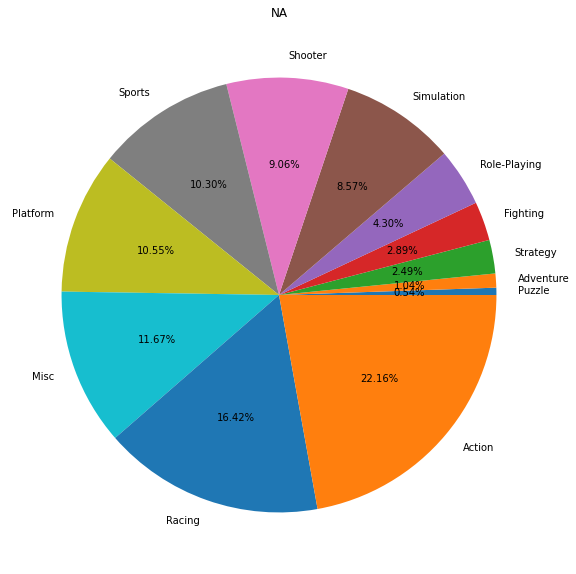

In [ ]:
sort_na = sales_area_genre_volume['NA'].sort_values()

plt.figure(figsize=(20,10))
plt.pie(sort_na, autopct='%.2f%%', labels=sort_na.index);
plt.title('NA')
plt.show()

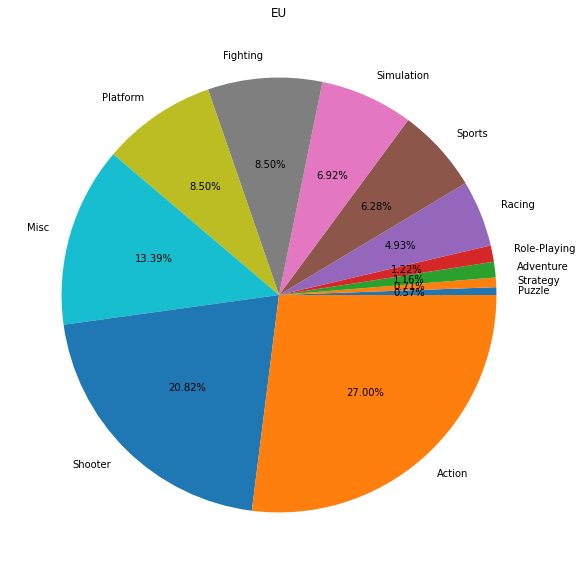

In [ ]:
sort_eu = sales_area_genre_volume['EU'].sort_values()

plt.figure(figsize=(20,10))
plt.pie(sort_eu, autopct='%.2f%%', labels=sort_eu.index);
plt.title('EU')
plt.show()

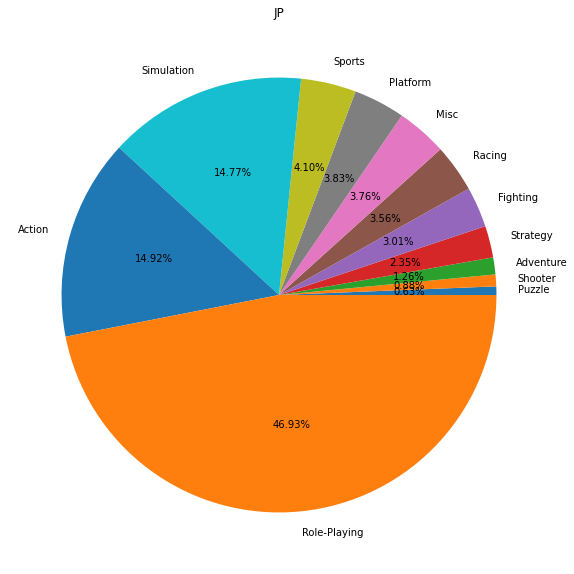

In [ ]:
sort_jp = sales_area_genre_volume['JP'].sort_values()

plt.figure(figsize=(20,10))
plt.pie(sort_jp, autopct='%.2f%%', labels=sort_jp.index);
plt.title('JP')
plt.show()

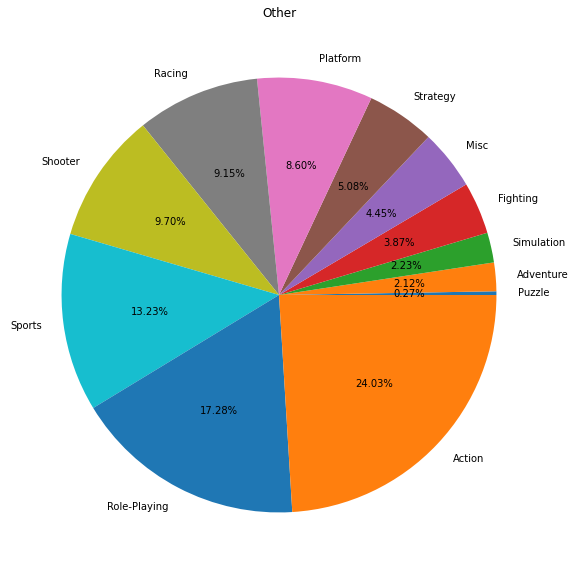

In [ ]:
sort_other = sales_area_genre_volume['Other'].sort_values()

plt.figure(figsize=(20,10))
plt.pie(sort_other, autopct='%.2f%%', labels=sort_other.index);
plt.title('Other')
plt.show()

---

**2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.**

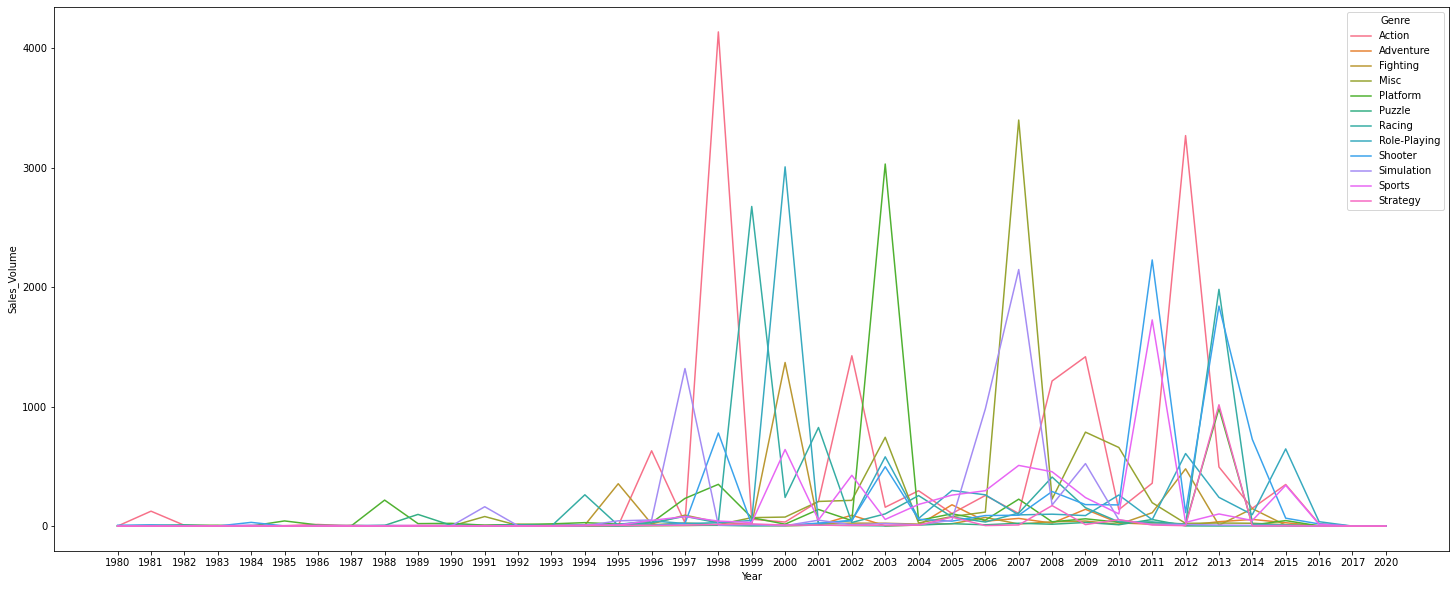

In [ ]:
plt.figure(figsize=(25,10))

year_genre = df.groupby(['Year', 'Genre'])['Sales_Volume'].sum()
year_genre = year_genre.reset_index()
sns.lineplot(x=year_genre['Year'], y=year_genre['Sales_Volume'], hue=year_genre['Genre']);


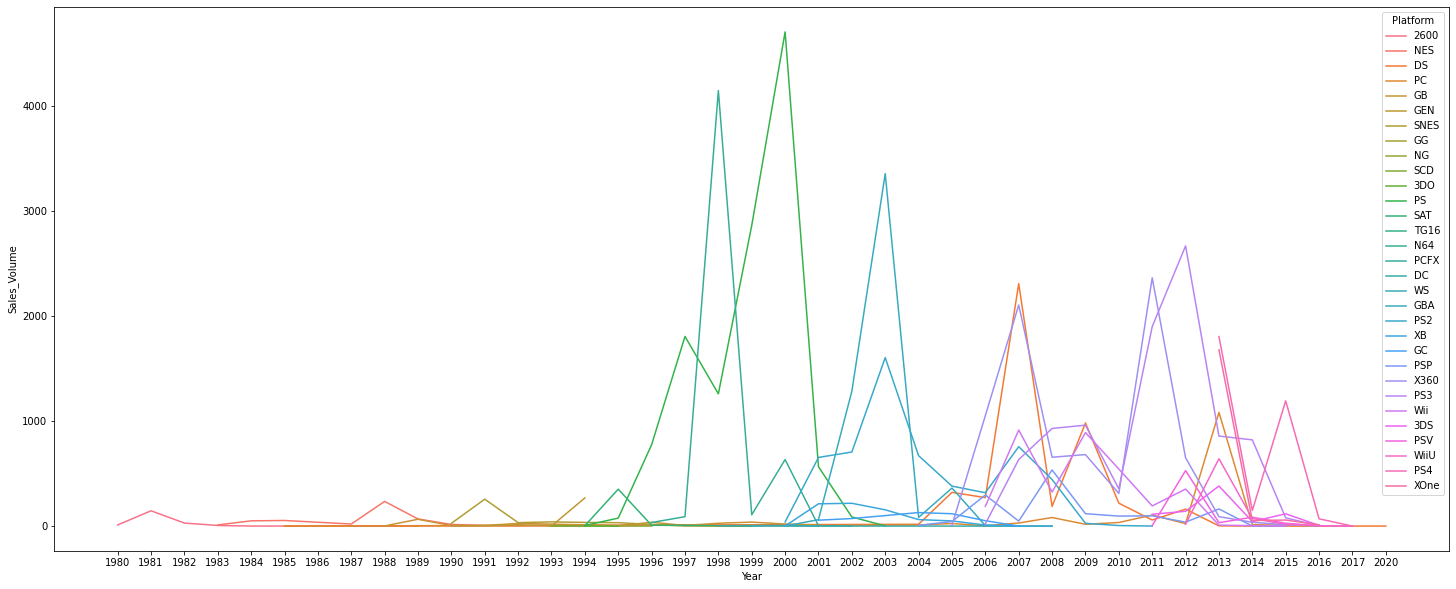

In [ ]:
plt.figure(figsize=(25,10))

year_platform = df.groupby(['Year', 'Platform'])['Sales_Volume'].sum()
year_platform = year_platform.reset_index()
year_platform = year_platform[year_platform['Sales_Volume'] > 0].reset_index(drop=True)

sns.lineplot(x=year_platform['Year'], y=year_platform['Sales_Volume'], hue=year_platform['Platform']);

---

**3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.**

In [ ]:
sales_volume_info = df.groupby(['Name', 'Genre', 'Platform', 'Publisher'])['Sales_Volume'].sum().sort_values(ascending=False).reset_index()[:10]
sales_volume_info

,Name,Genre,Platform,Publisher,Sales_Volume
0,The Legend of Zelda: Ocarina of Time,Action,N64,Nintendo,4103.50
1,Super Mario Bros. 3,Platform,GBA,Nintendo,2932.28
2,Final Fantasy IX,Role-Playing,PS,SquareSoft,2782.53
3,Crash Team Racing,Racing,PS,Sony Computer Entertainment,2572.22
4,Assassin's Creed III,Action,PS3,Ubisoft,2563.94
5,Battlefield 3,Shooter,X360,Electronic Arts,2135.21
6,Guitar Hero II,Misc,X360,Activision,2010.19
7,Call of Duty: Ghosts,Shooter,PS4,Activision,1781.85
8,Cooking Mama 2: Dinner With Friends,Simulation,DS,505 Games,1611.99
9,NBA 2K12,Sports,PS3,Take-Two Interactive,1610.50


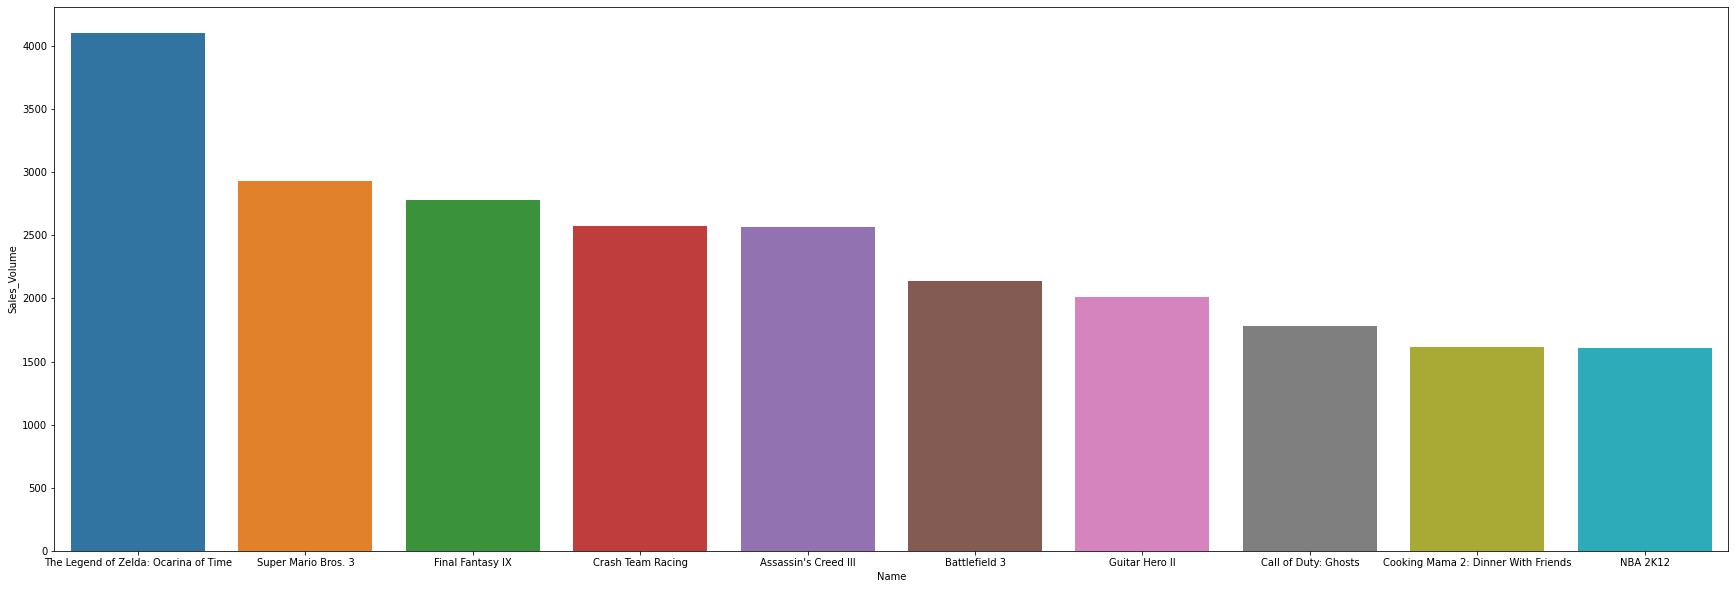

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x=sales_volume_info['Name'], y=sales_volume_info['Sales_Volume']);

In [ ]:
zelda_df = df[df['Name'] == 'The Legend of Zelda: Ocarina of Time']
zelda_df.sort_values('Year')

,Name,Platform,Year,Genre,Publisher,Sales_Area,Sales_Volume
1412,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,NA,4100.00
13367,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,EU,1.89
23728,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,JP,1.45
30301,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,Other,0.16
2296,The Legend of Zelda: Ocarina of Time,3DS,2011,Action,Nintendo,NA,2.03
14183,The Legend of Zelda: Ocarina of Time,3DS,2011,Action,Nintendo,EU,1.27
24147,The Legend of Zelda: Ocarina of Time,3DS,2011,Action,Nintendo,JP,0.62
31041,The Legend of Zelda: Ocarina of Time,3DS,2011,Action,Nintendo,Other,0.30


In [ ]:
# 40년동안 총 액션 게임 가운데 27%의 출고량 차지

round(zelda_df['Sales_Volume'].sum() / df[df['Genre'] == 'Action']['Sales_Volume'].sum(), 2)

0.27

Sony Computer Entertainment 퍼블리셔 소속으로써 어떤 지역에서 새로운 장르와 자체 개발 게임을 선택하여 개발하면 안전한 출고량을 넘어 설 수 있을까?

In [ ]:
# 자회사 개발 이력
sony_df = df.query('Publisher == "Sony Computer Entertainment"').sort_values('Sales_Volume', ascending=False)

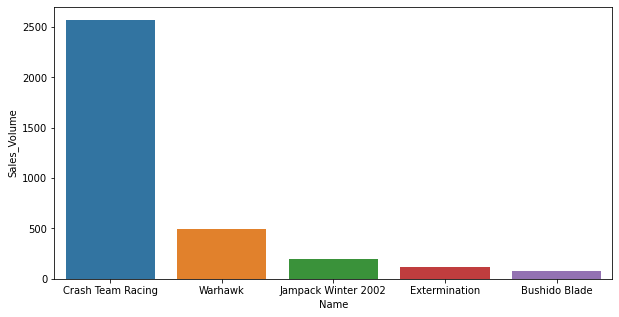

In [ ]:
# 자회사 상위 5개 출고량
plt.figure(figsize=(10,5))
sns.barplot(x=sony_df['Name'][:5], y=sony_df['Sales_Volume']);

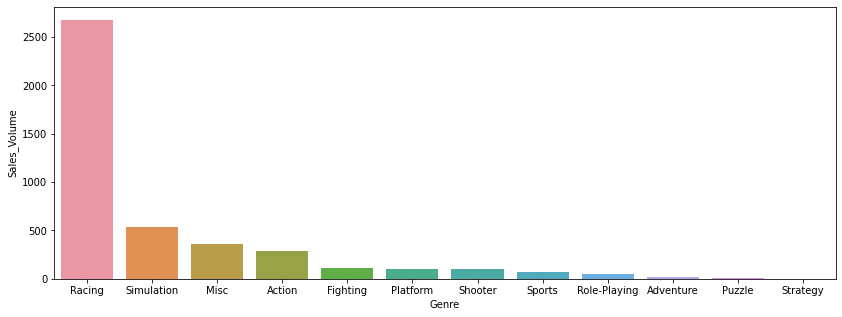

In [ ]:
# 자사 장르별 출고량
sony_df_genre = sony_df.groupby('Genre')['Sales_Volume'].sum().reset_index().sort_values('Sales_Volume', ascending=False)
plt.figure(figsize=(14,5))
sns.barplot(x=sony_df_genre['Genre'], y=sony_df_genre['Sales_Volume']);

In [ ]:
# Racing 장르의 출고량 
round(sony_df_genre[sony_df_genre['Genre'] == 'Racing']['Sales_Volume'] / sony_df_genre['Sales_Volume'].sum(), 2)

6    0.62
Name: Sales_Volume, dtype: float64

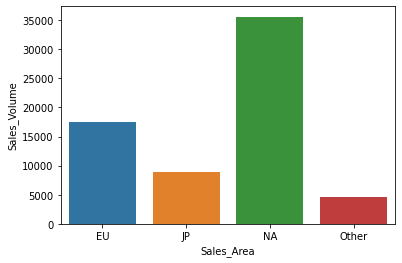

In [ ]:
# 지역 출고량
sales_area_volumes = df.groupby('Sales_Area', as_index=False)['Sales_Volume'].sum()
sns.barplot(x=sales_area_volumes['Sales_Area'], y=sales_area_volumes['Sales_Volume']);

In [ ]:
# NA 지역의 상대적 출고 퍼센트 - NA 지역을 중심으로 전폭적 마케팅 필요.
round(sales_area_volumes.query('Sales_Area == "NA"')['Sales_Volume'] / sales_area_volumes['Sales_Volume'].sum(), 2)

2    0.53
Name: Sales_Volume, dtype: float64

In [ ]:
import random
random.seed(10)

In [ ]:
# 귀무 가설 : Action 장르로 개발하면 평균 출고량을 보장하지 못한다. , 대립 가설 : Action 장르로 개발하면 평균 출고량을 보장한다.
action_means = []

for _ in range(10000):
  bootsample = df[df['Genre'] == 'Action'].sample(15000, replace=True)
  action_means.append(bootsample['Sales_Volume'].mean())

In [ ]:
low, upper = np.percentile(action_means, 2.5),np.percentile(action_means, 97.5) 
print(low, upper)

1.0493462 2.8554845166666665


In [ ]:
# sales voulume 평균값
sales_volume_mean = df['Sales_Volume'].mean()
sales_volume_mean

1.7302452918530846

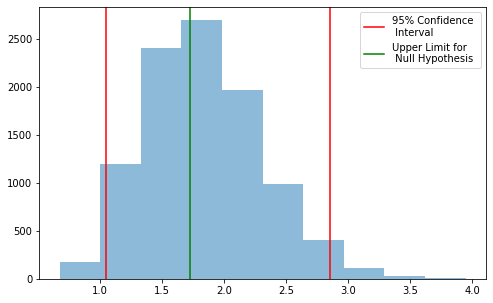

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(action_means, alpha=0.5)
plt.axvline(x=low, color='r')
plt.axvline(x=upper, color='r', label='95% Confidence \n Interval')
plt.axvline(x=sales_volume_mean, color='g', label = 'Upper Limit for \n Null Hypothesis')
plt.legend(fontsize=10);

In [ ]:
action_sample_mean = df[df['Genre'] == 'Action']['Sales_Volume'].mean()
action_sample_mean

1.8373655256723718

In [ ]:
action_sample_std = np.std(action_means)
action_sample_std

0.46873513562314584

In [ ]:
# 귀무가설을 기각하지 못한다 : Action 장르로 개발하면 평균 출고량을 보장하지 못한다.
null_vals = np.random.normal(sales_volume_mean, action_sample_std, 10000)
(null_vals > action_sample_mean).mean()

0.4064

In [ ]:
# Action 장르 개발로 평균 출고량을 보장하지 못하기 때문에 다른 장르 p-value 확인을 위한 test
test_means = []

for _ in range(10000):
  bootsample = df[df['Genre'] == 'Racing'].sample(15000, replace=True)
  test_means.append(bootsample['Sales_Volume'].mean())

In [ ]:
test_sample_mean = df[df['Genre'] == 'Racing']['Sales_Volume'].mean()
test_sample_std = np.std(test_means)

test_null_vals = np.random.normal(sales_volume_mean, test_sample_std, 10000)
(test_null_vals > test_sample_mean).mean()

0.0753

###각 장르의 p-value
* Platform - 0.0602
* Role-Playing - 0.3051
* Racing - 0.0719
* Shooter - 0.1696
* Misc - 0.2669
* Simulation - 0.0012
* Sports - 0.9999
* Adventure - 1.0
* Fighting - 0.8707
* Puzzle - 1.0
* Strategy - 0.9996

위 결과로 보아 안전빵은 Simulation장르를 개발하는 것이다. 허나 NA지역에서의 Simulation 장르의
선호 순위가 7위인 전체 시장의 8.57%밖에 되지 않기 때문에 다음으로 안전빵인 Platform 장르를 선택하고자 한다면 자사의 Platform 장르 개발 이력이 없고 NA지역 장르 선호 순위 4위인 10.55%정도의 영향력을 가지고 있다. 그 다음의 안전빵인 Racing 분야를 보자면 NA지역 장르 선호 순위 2위이고 16.42%의 영향력과 자사 Crash Team Racing라는 개발 이력을 통해 최고의 출고량을 보였던 경험이 있기에 어느 정도의 안전성과 출고량을 생각해보면 NA지역에 Racing 장르를 개발하는 것이 여러가지로 좋아 보인다.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()

In [ ]:
df_2 = df.copy()

df_2

,Name,Platform,Year,Genre,Publisher,Sales_Area,Sales_Volume
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,NA,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,NA,0.17
2,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,NA,0.04
3,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,NA,0.12
4,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,NA,0.02
...,...,...,...,...,...,...,...
39226,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,Other,80.00
39227,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,Other,0.01
39228,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,Other,0.13
39229,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,Other,0.03


In [ ]:
df_2 = df_2.astype({'Year':'object'})
df_2['Year'] = pd.to_datetime(df_2['Year'], format='%Y')
max_date = max(df_2['Year'])
df_2['DateDiff'] = max_date - df_2['Year']

In [ ]:
rfm_r = df_2.groupby('Name', as_index=False)['DateDiff'].min()
rfm_r.head()

,Name,DateDiff
0,'98 Koshien,8035 days
1,.hack//G.U. Vol.1//Rebirth,5113 days
2,.hack//G.U. Vol.2//Reminisce,5113 days
3,.hack//G.U. Vol.2//Reminisce (jp sales),5113 days
4,.hack//G.U. Vol.3//Redemption,4748 days


In [ ]:
seconds_value = []

for i in range(len(rfm_r.DateDiff)):
    seconds_value.append(rfm_r.DateDiff[i].total_seconds())

# 최신 출고 경과 기간
rfm_r.DateDiff = seconds_value
rfm_r.head()

,Name,DateDiff
0,'98 Koshien,694224000.0
1,.hack//G.U. Vol.1//Rebirth,441763200.0
2,.hack//G.U. Vol.2//Reminisce,441763200.0
3,.hack//G.U. Vol.2//Reminisce (jp sales),441763200.0
4,.hack//G.U. Vol.3//Redemption,410227200.0


In [ ]:
# 출고 횟수
rfm_f = df_2.groupby('Name', as_index=False)['Sales_Area'].count()

rfm_f.columns = ['Name', 'Frequency']

rfm_f.head()

,Name,Frequency
0,'98 Koshien,4
1,.hack//G.U. Vol.1//Rebirth,1
2,.hack//G.U. Vol.2//Reminisce,3
3,.hack//G.U. Vol.2//Reminisce (jp sales),1
4,.hack//G.U. Vol.3//Redemption,1


In [ ]:
# 게임별 총 출고량
rfm_m = df_2.groupby('Name', as_index=False)['Sales_Volume'].sum()
rfm_m.head()

,Name,Sales_Volume
0,'98 Koshien,0.40
1,.hack//G.U. Vol.1//Rebirth,0.17
2,.hack//G.U. Vol.2//Reminisce,0.23
3,.hack//G.U. Vol.2//Reminisce (jp sales),0.16
4,.hack//G.U. Vol.3//Redemption,0.17


In [ ]:
rfm_r = rfm_r.set_index('Name')
rfm_f = rfm_f.set_index('Name')
rfm_m = rfm_m.set_index('Name')

rfm = rfm_r.join([rfm_f, rfm_m], how='inner')

col_names = ['Recency','Frequency','Monetary']

rfm.columns = col_names

rfm.head()

rfm.drop_duplicates(inplace=True)

rfm.duplicated().sum()

0

In [ ]:
zero_value = rfm[rfm.Recency == rfm.Recency.min()]
rfm = rfm.drop(zero_value.index)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


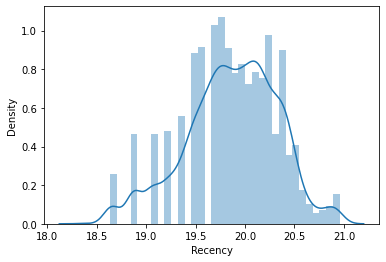

In [ ]:
recency_log = np.log(rfm['Recency'])

sns.distplot(recency_log);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


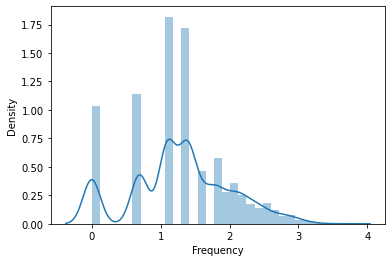

In [ ]:
frequency_log = np.log(rfm['Frequency'])

sns.distplot(frequency_log);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


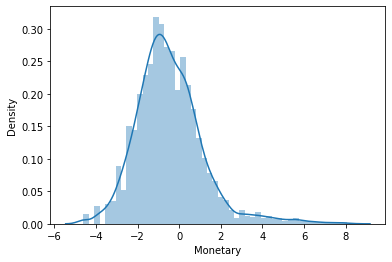

In [ ]:
monetary_log = np.log(rfm['Monetary'])

sns.distplot(monetary_log);

In [ ]:
log_rfm = pd.concat([recency_log, frequency_log, monetary_log], axis=1)

log_rfm.head()

,Recency,Frequency,Monetary
Name,,,
'98 Koshien,20.358305,1.386294,-0.916291
.hack//G.U. Vol.1//Rebirth,19.906285,0.000000,-1.771957
.hack//G.U. Vol.2//Reminisce,19.906285,1.098612,-1.469676
.hack//G.U. Vol.2//Reminisce (jp sales),19.906285,0.000000,-1.832581
.hack//G.U. Vol.3//Redemption,19.832222,0.000000,-1.771957


In [ ]:
rfm_scaled = scaler.fit_transform(log_rfm)

In [ ]:
print('mean: ', rfm_scaled.mean(axis=0).round(2))
print('std: ', rfm_scaled.std(axis=0).round(2))

mean:  [ 0. -0.  0.]
std:  [1. 1. 1.]


In [ ]:
from sklearn.cluster import KMeans
sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(rfm_scaled)
  sse[k] = kmeans.inertia_

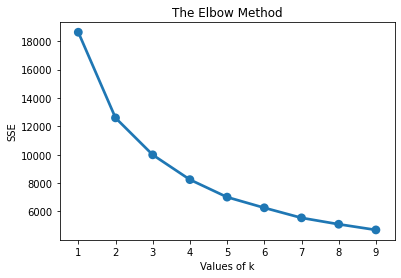

In [ ]:
# 결과 시각화

plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
# 최종 모델 학습
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)

# 게임별 클러스터 지정
cluster_labels = kmeans.labels_

rfm_k3 = rfm.assign(Cluster = cluster_labels)

In [ ]:
rfm_k3.head()

,Recency,Frequency,Monetary,Cluster
Name,,,,
'98 Koshien,694224000.0,4,0.40,3
.hack//G.U. Vol.1//Rebirth,441763200.0,1,0.17,1
.hack//G.U. Vol.2//Reminisce,441763200.0,3,0.23,3
.hack//G.U. Vol.2//Reminisce (jp sales),441763200.0,1,0.16,1
.hack//G.U. Vol.3//Redemption,410227200.0,1,0.17,1


In [ ]:
# seconds를 다시 days로 바꿉니다.
rfm_k3.Recency = rfm_k3.Recency // (24 * 3600)

cluster_avg = rfm_k3.groupby(['Cluster']).mean()
cluster_avg

,Recency,Frequency,Monetary
Cluster,,,
0,4056.227496,9.938625,49.745016
1,7063.512840,1.718278,0.235325
2,3111.482947,3.679400,0.504809
3,6754.678035,4.269668,1.856608


In [ ]:
cluster1_df = pd.merge(rfm_k3[rfm_k3['Cluster'] == 0], df_2[['Name', 'Genre']], how='left', on='Name')
cluster1_df.drop_duplicates(inplace=True)
cluster1_df.reset_index(drop=True)

cluster1_df.sort_values('Monetary', ascending=False).head()


,Name,Recency,Frequency,Monetary,Cluster,Genre
10246,The Legend of Zelda: Ocarina of Time,3287.0,8,4107.72,0,Action
9672,Super Mario Bros. 3,6209.0,8,2949.56,0,Platform
3349,Final Fantasy IX,7305.0,4,2782.53,0,Role-Playing
1560,Crash Team Racing,7670.0,4,2572.22,0,Racing
291,Assassin's Creed III,2922.0,14,2570.54,0,Action


In [ ]:
population_avg = rfm.mean()
population_avg

Recency      4.691248e+08
Frequency    4.701819e+00
Monetary     1.061386e+01
dtype: float64

In [ ]:
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,-1.0,1.11,3.69
1,-1.0,-0.63,-0.98
2,-1.0,-0.22,-0.95
3,-1.0,-0.09,-0.83


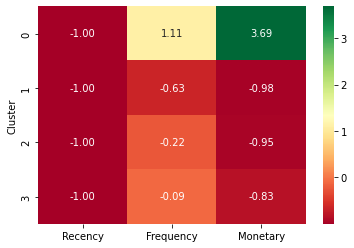

In [ ]:
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap = "RdYlGn");